Author: Clement Chen</br>
E-Mail: clement1972@gmail.com</br>
https://sites.google.com/site/clement1972/</br>

# 參數設定

### <font color='red'>請修改下面的參數</font>

In [1]:
# eval_metric 評估指標
# options for classification:
#  ['accuracy', 'balanced_accuracy', 'f1', 'f1_macro', 'f1_micro', 'f1_weighted',
#  'roc_auc', 'roc_auc_ovo_macro', 'average_precision', 'precision', 'precision_macro',
#  'precision_micro', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro',
# 'recall_weighted', 'log_loss', 'pac_score']
#
# Options for regression:
#  ['root_mean_squared_error', 'mean_squared_error', 'mean_absolute_error',
#  'median_absolute_error', 'mean_absolute_percentage_error','r2']
eval_metric = 'roc_auc'
# eval_metric = 'r2'

# data_filename 預測資料來源的檔名
data_filename = 'C:/DATA/class/data/人員資料_test.xlsx'

# prediction_filename 模型預測結果的檔名
prediction_filename = 'C:/DATA/class/output/人員資料_test_prediction.xlsx'

# model_path 模型儲存資料夾
model_path = 'C:/DATA/class/output/model_人員資料'


### 環境設定

### 載入資料

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel(data_filename)
data

,員工編號(EmployeeNumber),性別(Gender),年齡(Age),是否為成年人(Over18),婚姻狀態(MaritalStatus),通勤距離(DistanceFromHome),教育程度(Education),教育專業領域(EducationField),部門(Department),職位名稱(JobRole),...,股票選擇權等級(StockOptionLevel),績效評估(PerformanceRating),出差頻率(BusinessTravel),去年訓練時間(TrainingTimesLastYear),工作滿意度(JobSatisfaction),工作環境滿意度(EnvironmentSatisfaction),工作投入(JobInvolvement),工作生活平衡(WorkLifeBalance),人際關係滿意度(RelationshipSatisfaction),離職(Attrition)
0,1469,Male,28,Y,Single,5,3,Medical,Sales,Sales Executive,...,0,3,Travel_Rarely,4,1,4,3,3,4,No
1,250,Female,53,Y,Divorced,13,2,Medical,Research & Development,Manufacturing Director,...,2,3,Travel_Rarely,3,1,4,4,3,3,No
2,1714,Male,24,Y,Married,22,1,Human Resources,Human Resources,Human Resources,...,1,3,Travel_Rarely,2,3,4,1,3,3,Yes
3,86,Male,45,Y,Divorced,7,3,Life Sciences,Research & Development,Research Scientist,...,1,3,Travel_Rarely,2,1,2,3,3,3,No
4,304,Male,36,Y,Single,5,2,Life Sciences,Research & Development,Laboratory Technician,...,0,3,Travel_Rarely,3,2,4,3,4,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,786,Male,34,Y,Single,2,3,Other,Sales,Sales Executive,...,0,4,Travel_Rarely,5,4,4,3,3,3,No
290,775,Female,34,Y,Divorced,8,5,Life Sciences,Research & Development,Manufacturing Director,...,1,3,Travel_Rarely,3,1,2,3,3,3,No
291,1317,Female,50,Y,Married,28,3,Life Sciences,Research & Development,Research Director,...,0,3,Travel_Rarely,2,1,4,3,3,2,No
292,715,Male,37,Y,Single,10,2,Life Sciences,Research & Development,Research Scientist,...,0,3,Travel_Rarely,2,4,4,4,3,1,No


### 載入模型

In [4]:
from autogluon.tabular import TabularDataset, TabularPredictor

C:\venv\autogluon\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import pickle
with open(model_path+'/used_field.bin', 'rb') as handle:
  used_field = pickle.load(handle)

input_field = used_field['input_field']
target_field = used_field['target_field']
working_field = input_field.copy()
working_field.append(target_field)

model = TabularPredictor.load(model_path)

# 輸出預測結果

In [6]:
prediction_p = None
if (model.problem_type != 'regression'):
  prediction_p = model.predict_proba(data)
prediction = model.predict(data)

In [8]:
pred_data = data.copy()
pred_data['預測結果'] = prediction
pred_data = pd.concat([pred_data,prediction_p], axis=1, join='inner')
pred_data.to_excel(prediction_filename)

# 評估分數

In [9]:
model.evaluate(data)

{'roc_auc': 0.8067370537958773,
 'accuracy': 0.8843537414965986,
 'balanced_accuracy': 0.5858220211161388,
 'mcc': 0.3379772303312995,
 'f1': 0.2916666666666667,
 'precision': 0.7777777777777778,
 'recall': 0.1794871794871795}

# 欄位重要性

In [11]:
output = ''
if target_field in data:
    output = model.feature_importance(data)
output

These features in provided data are not utilized by the predictor and will be ignored: ['是否為成年人(Over18)', '標準工作時間(StandardHours)']


,importance,stddev,p_value,n,p99_high,p99_low
加班(OverTime),0.042132,0.020808,0.005298,5,0.084975,-0.000712
工作環境滿意度(EnvironmentSatisfaction),0.034470,0.002225,0.000002,5,0.039051,0.029888
出差頻率(BusinessTravel),0.026104,0.003508,0.000038,5,0.033327,0.018880
工作投入(JobInvolvement),0.023851,0.011484,0.004852,5,0.047497,0.000206
工作滿意度(JobSatisfaction),0.022745,0.010149,0.003715,5,0.043641,0.001849
通勤距離(DistanceFromHome),0.018039,0.006738,0.001958,5,0.031914,0.004165
工作生活平衡(WorkLifeBalance),0.017516,0.004024,0.000312,5,0.025802,0.009230
職位名稱(JobRole),0.016551,0.010416,0.011864,5,0.037997,-0.004895
教育專業領域(EducationField),0.010799,0.004206,0.002281,5,0.019460,0.002139
人際關係滿意度(RelationshipSatisfaction),0.010437,0.006597,0.012028,5,0.024020,-0.003145


# 圖表 - 分類問題

## ROC Curve

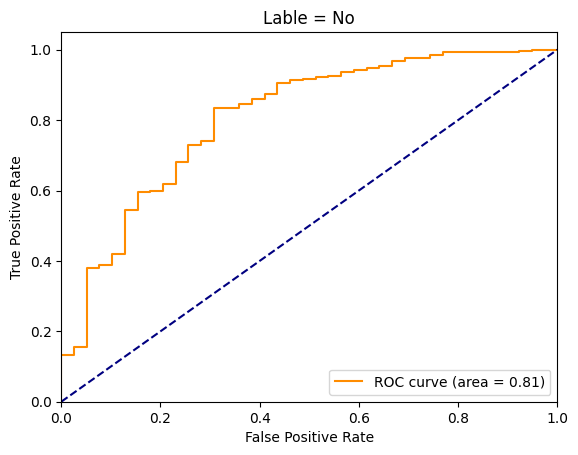

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt

class_labels = model.class_labels

if target_field in data:
    if (model.problem_type != 'regression'):
        if (model.problem_type == 'binary'):
            class_labels = [class_labels[0]]

        for n,label in enumerate(class_labels):
            roc_score = roc_auc_score(np.array(data[target_field] == label,dtype='int'), prediction_p[label])

            fpr, tpr, thresholds = metrics.roc_curve(np.array(data[target_field] == label,dtype='int'), prediction_p[label])

            plt.figure()
            plt.plot(fpr,tpr,color="darkorange",label="ROC curve (area = %0.2f)" % roc_score)
            plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("Lable = "+str(label))
            plt.legend(loc="lower right")
            plt.show()

## Confusion Matrix

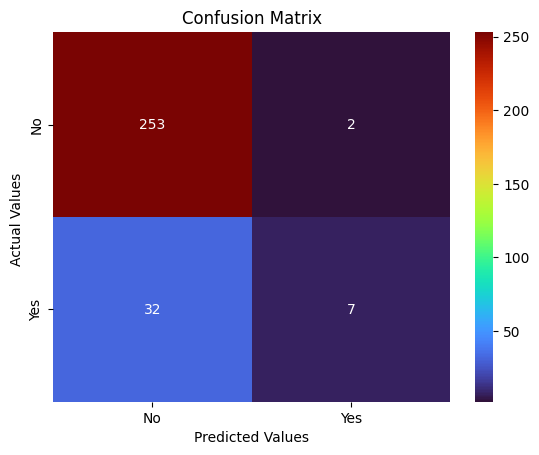

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

if target_field in data:
    if (model.problem_type != 'regression'):
        conf_matrix = (confusion_matrix(data[target_field], prediction))
        conf_matrix_df = pd.DataFrame(conf_matrix, model.class_labels, model.class_labels)
        conf_matrix_df

        fx = sns.heatmap(conf_matrix_df, annot=True, cmap='turbo', fmt='d')

        fx.set_title('Confusion Matrix')
        fx.set_xlabel('Predicted Values')
        fx.set_ylabel('Actual Values ')

# 圖表 - 回歸問題

In [16]:
import seaborn as sns

if target_field in data:
    if (model.problem_type == 'regression'):
        sns.regplot(x = data[target_field], y = prediction)
        plt.xlabel("real")
        plt.ylabel("prediction")